# Applying ML Models on Red Wine Dataset

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [2]:
Data=pd.read_csv(r'D:\2nd year\PBL\winequality-red.csv')
Data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
Data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
X = Data.drop('quality', axis=1)
y = Data['quality']
X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

# Decision Tree

In [8]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [9]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
dtscore=dt.score(X_test,y_test)
print(dtscore)

Accuracy: 0.69375
0.69375


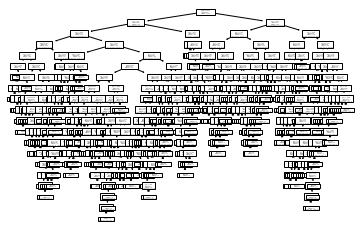

In [10]:
from sklearn import tree
p=tree.plot_tree(dt)


# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)

y_pred = model.predict(X_test)

#Predicting the accuracy
from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test,y_pred))
rfscore=rf.score(X_test,y_test)
print(rfscore)

Accuracy: 0.725
0.725


# Naive Bayesian

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
nbscore=gnb.score(X_test,y_test)
print(nbscore)

Accuracy Score: 0.55
0.55


# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression 

# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test) 

score = regressor.score(X_test,y_test)
print("Accuracy:",score)
lrscore=regressor.score(X_test,y_test)
print(lrscore)

Accuracy: 0.3754832358290441
0.3754832358290441


# Lasso Regression

In [14]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)
#Predicting the score 
score = lassoReg.score(X_test,y_test)
print("Accuracy:",score)
lsscore = lassoReg.score(X_test,y_test)
print(lsscore)

Accuracy: 0.377840851746141
0.377840851746141


# AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)

#Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
abscore=abc.score(X_test,y_test)
print(abscore)

Accuracy: 0.5625
0.5625


# Support Vector Machine

In [16]:
from sklearn.svm import SVC

svm= SVC(kernel = 'rbf', random_state = 1)
svm.fit(X_train, y_train)
y_preds = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_preds))
svmscore=svm.score(X_test,y_test)
print(svmscore)

Accuracy: 0.46875
0.46875


In [17]:
r1=["Linear Regression","Lasso Regression","AdaBoost","Random Forest","SVM","Decision Tree","Naive Bayes"]
r2=[lrscore,lsscore,abscore,rfscore,svmscore,dtscore,nbscore]
scores=pd.DataFrame(list(zip(r1,r2)),columns =['ML models', 'Scores'])
scores.sort_values(by=['Scores'],ascending=False)

,ML models,Scores
3,Random Forest,0.725000
5,Decision Tree,0.693750
2,AdaBoost,0.562500
6,Naive Bayes,0.550000
4,SVM,0.468750
1,Lasso Regression,0.377841
0,Linear Regression,0.375483
